In [3]:
%cd ..

import numpy as np
import matplotlib.pyplot as plt
from scripts.ulams_method import ulams_method

c:\Users\dbruw\DENR3901


In [4]:
alpha = 1.9

def f(x):
    return np.minimum(alpha*x, alpha*(1-x))

In [1]:
N = 1000  # Number of bins
M = 10000  # Number of random points per bin

L = ulams_method(N, M, f)

eigenvalues, eigenvectors = np.linalg.eig(L)

idx = np.argsort(-np.abs(eigenvalues))
eigenvalues = eigenvalues[idx]

NameError: name 'ulams_method' is not defined

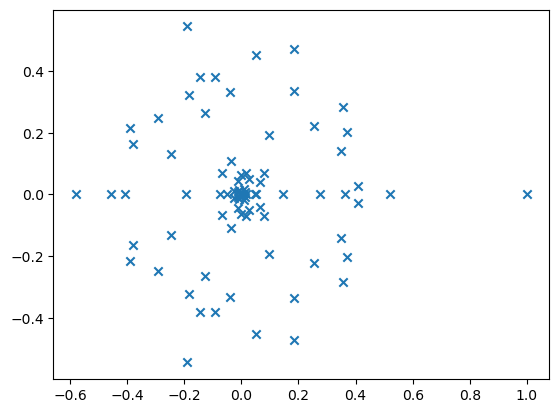

In [6]:
plt.scatter(eigenvalues.real, eigenvalues.imag, marker='x')